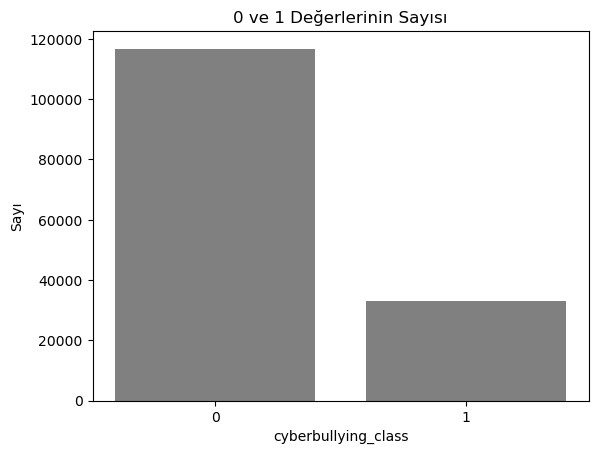

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Veri setini yükleme
data = pd.read_csv('/kaggle/input/cyberbullying/Cyberbullying_data.csv')

# 0 ve 1 değerlerinin sayısını hesaplama
count_0 = len(data[data['cyberbullying_class'] == 0])
count_1 = len(data[data['cyberbullying_class'] == 1])

# Grafik oluşturmak
labels = ['0', '1']
values = [count_0, count_1]
plt.bar(labels, values, color='grey')
plt.xlabel('cyberbullying_class')
plt.ylabel('Sayı')
plt.title('0 ve 1 Değerlerinin Sayısı')
plt.show()

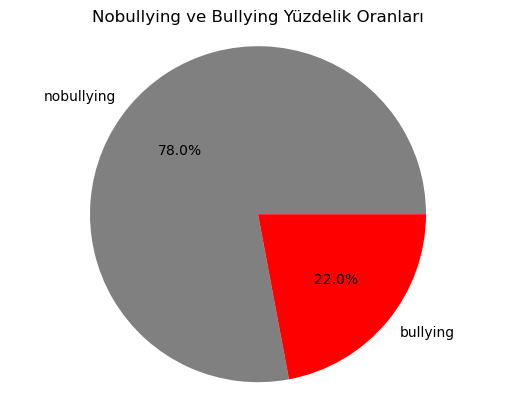

In [2]:
# "labels" sütunundaki değerleri sayma
count = data['labels'].value_counts()

# Yüzdelik oranları hesaplama
percentages = count / count.sum() * 100

# Grafik oluşturmak
labels = percentages.index
values = percentages.values
colors = ['grey', 'red']

plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Nobullying ve Bullying Yüzdelik Oranları')

plt.axis('equal')

plt.show()

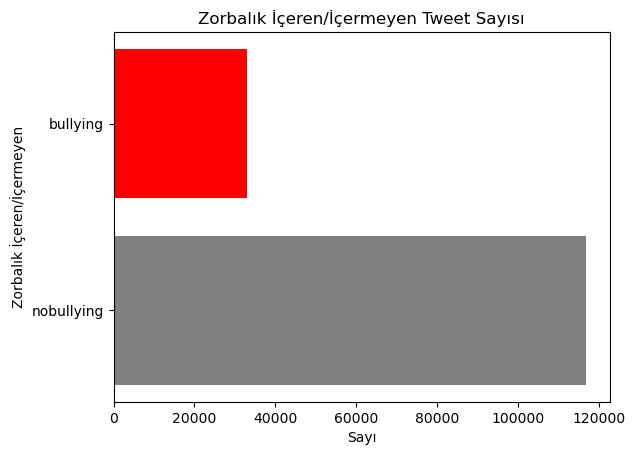

In [3]:
# Grafik oluşturma
labels = count.index
values = count.values
colors = ['grey', 'red']

plt.barh(labels, values, color=colors)  # x ve y ekseni yerlerini değiştiriyoruz
plt.xlabel('Sayı')  # x ekseninin etiketi
plt.ylabel('Zorbalık İçeren/İçermeyen')  # y ekseninin etiketi
plt.title('Zorbalık İçeren/İçermeyen Tweet Sayısı')

plt.show()

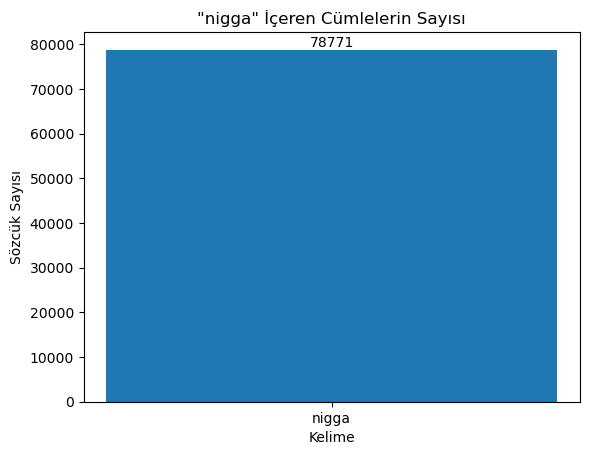

In [4]:
# "tweet_text" sütununda içinde "nigga" geçen cümlelerin sayısını hesapla
count = data['tweet_text'].str.contains('nigga', case=False).sum()

# Grafik oluşturma
labels = ['nigga']
values = [count]
plt.bar(labels, values)
plt.xlabel('Kelime')
plt.ylabel('Sözcük Sayısı')
plt.title('"nigga" İçeren Cümlelerin Sayısı')

# Tam sayı değerini grafiğe ekleme
plt.annotate(str(count), (0, count), ha='center', va='bottom')

plt.show()

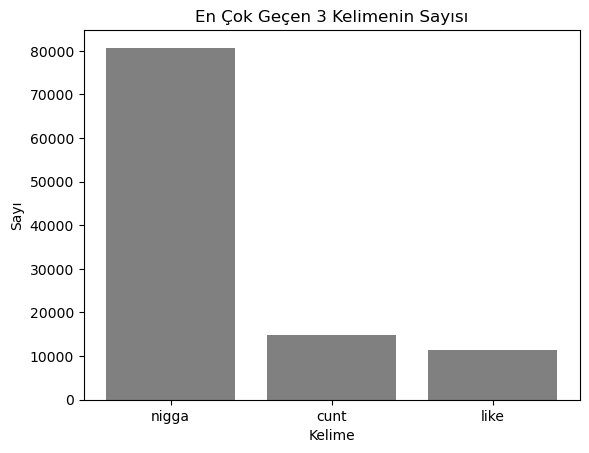

In [5]:
from collections import Counter

# "tweet_text" sütunundaki kelimeleri ayır ve say
word_counts = Counter(' '.join(data['tweet_text'].fillna('').values).split())

# En çok geçen 3 kelimeyi seçme
top_words = word_counts.most_common(3)

# Kelimeler ve sayıları ayrı listelere ayır
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Grafik oluşturma
plt.bar(words, counts, color='gray')
plt.xlabel('Kelime')
plt.ylabel('Sayı')
plt.title('En Çok Geçen 3 Kelimenin Sayısı')

plt.show()

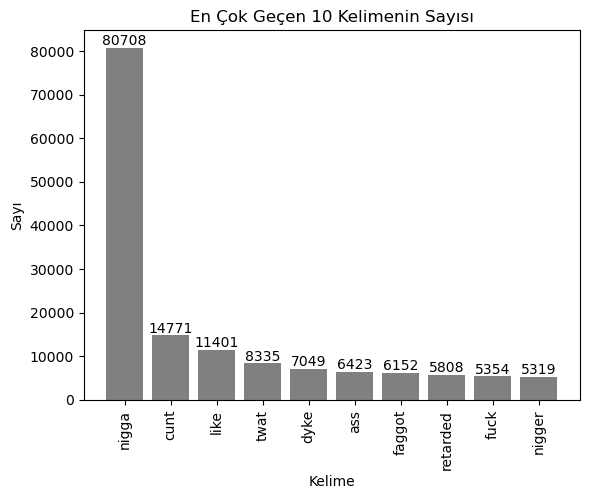

In [6]:
# En çok geçen 10 kelimeyi seç
most_common_words = word_counts.most_common(10)

# Kelimeler ve sayıları ayrı listelere ayır
words = [word for word, count in most_common_words]
counts = [count for word, count in most_common_words]

# Grafik oluşturma
plt.bar(words, counts, color='gray')
plt.xlabel('Kelime')
plt.ylabel('Sayı')
plt.title('En Çok Geçen 10 Kelimenin Sayısı')

# Kelime sayılarını grafiğe ekleme
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

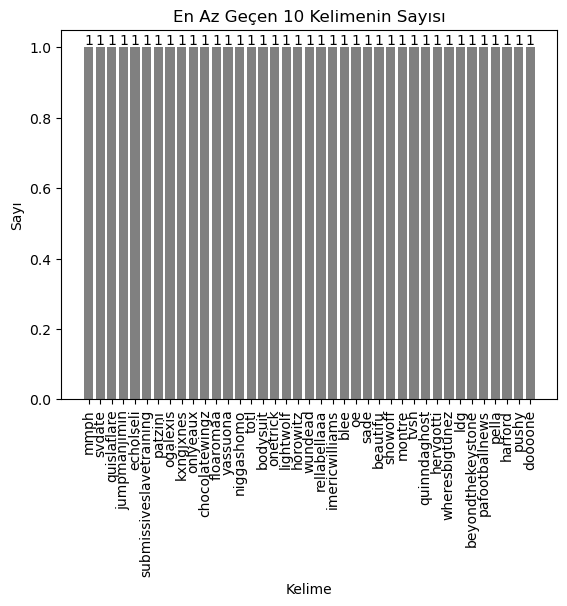

In [7]:
# En az geçen 10 kelimeyi seç
least_common_words = word_counts.most_common()[:-40:-1]

# Kelimeler ve sayıları ayrı listelere ayır
words = [word for word, count in least_common_words]
counts = [count for word, count in least_common_words]

# Grafik oluşturma
plt.bar(words, counts, color='gray')
plt.xlabel('Kelime')
plt.ylabel('Sayı')
plt.title('En Az Geçen 10 Kelimenin Sayısı')

# Kelime sayılarını grafiğe ekleme
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


lmaoooo: 310
lmaooooo: 294
lmaoooooo: 264
lmaooo: 233
lmfaooooo: 228
lmfaooooooo: 205
lmfaoooooo: 204
lmfaoooo: 182
lmaooooooo: 175
lmaoooooooo: 174


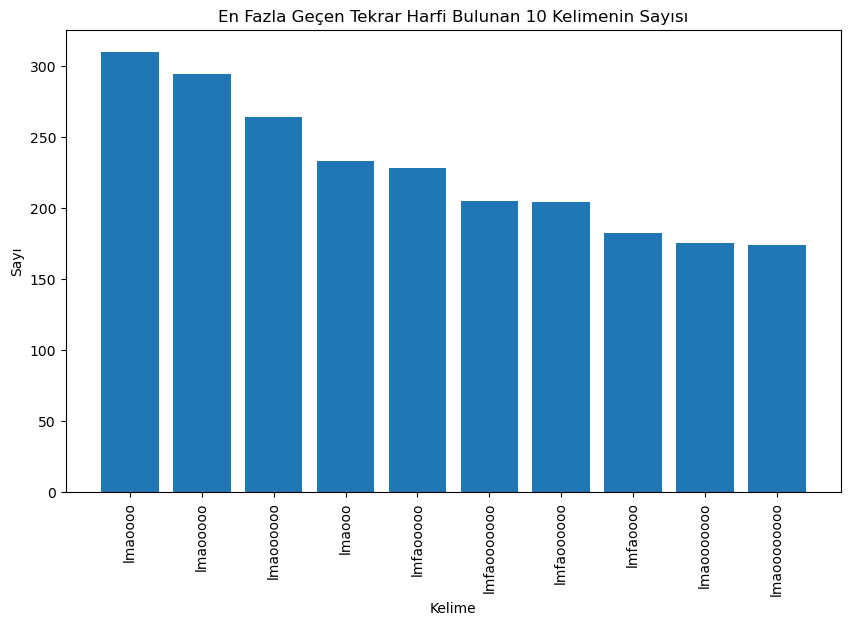

In [8]:
# "tweet_text" sütunundaki kelimeleri ayır
words = data['tweet_text'].str.split()

# Yan yana üç veya daha fazla aynı harften oluşan kelimeleri bul
word_counts = {}
for word_list in words:
    if isinstance(word_list, list):  # NaN kontrolü
        for word in word_list:
            for i in range(len(word) - 2):
                if word[i] == word[i+1] == word[i+2]:
                    if word in word_counts:
                        word_counts[word] += 1
                    else:
                        word_counts[word] = 1

# En fazla geçen 10 kelimeyi seç
top_10_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_words = dict(top_10_words)

# Kelimeleri ve sayılarını yazdır
for word, count in top_10_words.items():
    print(f"{word}: {count}")

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(top_10_words.keys(), top_10_words.values())
plt.xlabel('Kelime')
plt.ylabel('Sayı')
plt.title('En Fazla Geçen Tekrar Harfi Bulunan 10 Kelimenin Sayısı')
plt.xticks(rotation=90)
plt.show()

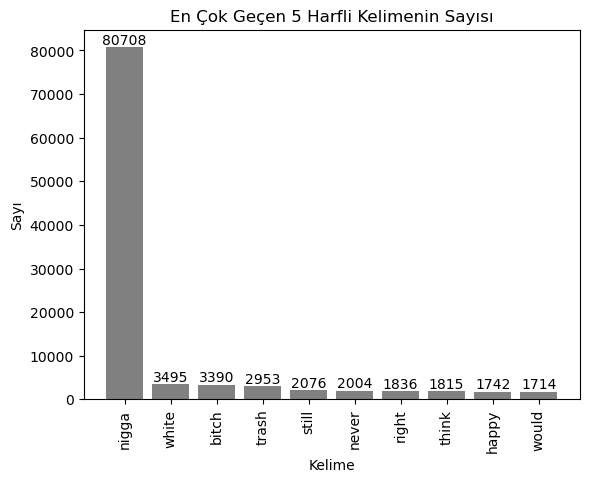

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


# "tweet_text" sütunundaki kelimeleri ayır ve 5 harfli olanları seç
words = ' '.join(data['tweet_text'].fillna('').values).split()
five_letter_words = [word for word in words if len(word) == 5]

# Kelime sayılarını hesapla
word_counts = Counter(five_letter_words)

# En çok geçen 10 kelimeyi seç
top_words = word_counts.most_common(10)

# Kelimeler ve sayıları ayrı listelere ayır
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

# Grafik oluşturma
plt.bar(words, counts, color='gray')
plt.xlabel('Kelime')
plt.ylabel('Sayı')
plt.title('En Çok Geçen 5 Harfli Kelimenin Sayısı')

# Kelime sayılarını grafiğe ekleme
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# "tweet_text" sütunundaki kelimeleri ayır
words = data['tweet_text'].str.split()

# Yan yana üç veya daha fazla aynı harften oluşan kelimeleri bul ve say
word_counts = Counter()
for word_list in words:
    if isinstance(word_list, list):  # NaN kontrolü
        for word in word_list:
            for i in range(len(word) - 2):
                if word[i] == word[i+1] == word[i+2]:
                    word_counts[word] += 1

# Kelimeleri ve sayılarını ayrı listelere ayır
labels, values = zip(*sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

# Kelimeleri ve sayılarını yazdır
for label, value in zip(labels, values):
    print(f"{label}: {value}")

# Veri setinden kelimeleri çıkar
for label in labels:
    data['tweet_text'] = data['tweet_text'].str.replace(label, '')

lmaoooo: 310
lmaooooo: 294
lmaoooooo: 264
lmaooo: 233
lmfaooooo: 228
lmfaooooooo: 205
lmfaoooooo: 204
lmfaoooo: 182
lmaooooooo: 175
lmaoooooooo: 174
lmfaooo: 133
lmfaooooooooooo: 108
lmfaoooooooo: 108
lmaooooooooo: 105
lmfaooooooooo: 98
sooooo: 90
soooo: 86
lmfaoooooooooooooo: 84
lmaoooooooooooooooooo: 80
lmfaoooooooooooo: 80
lmaooooooooooooo: 77
lmfaooooooooooooo: 77
lmfaooooooooooooooooooooooooooooooooooooooo: 74
lmaoooooooooo: 72
lmfaoooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo: 72
yoooo: 70
lmfaoooooooooooooooooooooooooooooooooooo: 68
yooooo: 66
lmfaoooooooooo: 64
lmfaoooooooooooooooo: 56
lmaooooooooooo: 54
nooooo: 51
lmfaooooooooooooooooooooooooooooooooooooooooooooooooooo: 49
ahhhh: 48
presssec: 48
soooooo: 48
awwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww: 47
sooo: 46
lmfaooooooooooooooooo: 45
whattttttttttt: 45
lmaooooooooooooooooooooooooooooooooooooooooooooooo: 45
lmaoooooooooooooooooooooooooooooooooooooooooooooo: 44
yooo: 43
lmfaoooooooooooooo

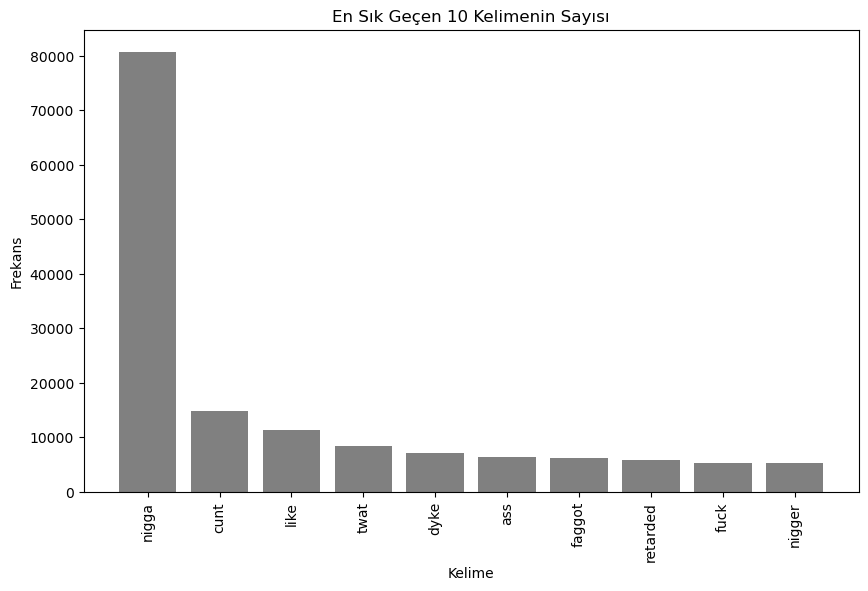

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Veri setini yükle
data = pd.read_csv('/kaggle/input/cyberbullying/Cyberbullying_data.csv')

# "tweet_text" sütunundaki metin verilerini birleştir
text = ' '.join(data['tweet_text'].astype(str))

# metin verilerini temizleyin
text = text.lower()  # küçük harfe dönüştürün
text = text.split()  # kelimelere ayırın

# Tekrarlanan kelimelerin sayısını hesapla
word_counts = Counter(text)

# En sık kullanılan 10 kelimeyi seç
top_10_words = dict(word_counts.most_common(10))

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(top_10_words.keys(), top_10_words.values(), color='gray')
plt.xlabel('Kelime')
plt.ylabel('Frekans')
plt.title('En Sık Geçen 10 Kelimenin Sayısı')
plt.xticks(rotation=90)
plt.show()